# 14주차 실습 - 다중회귀모델 (Multiple Linear Regression Model)


In [ ]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision %.3f
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline


: 

In [4]:
auto = sns.load_dataset("mpg")
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## 데이터 확인 및 결측값 리리

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
auto.isnull().sum()
# 398개 record 중 horsepower에 null값이 포함됨.

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [15]:
# 결측값(NaN)이 포함된 행 거거
auto.dropna(inplace=True)
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


### 기술통계량 및 데이터 시각화 

In [16]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


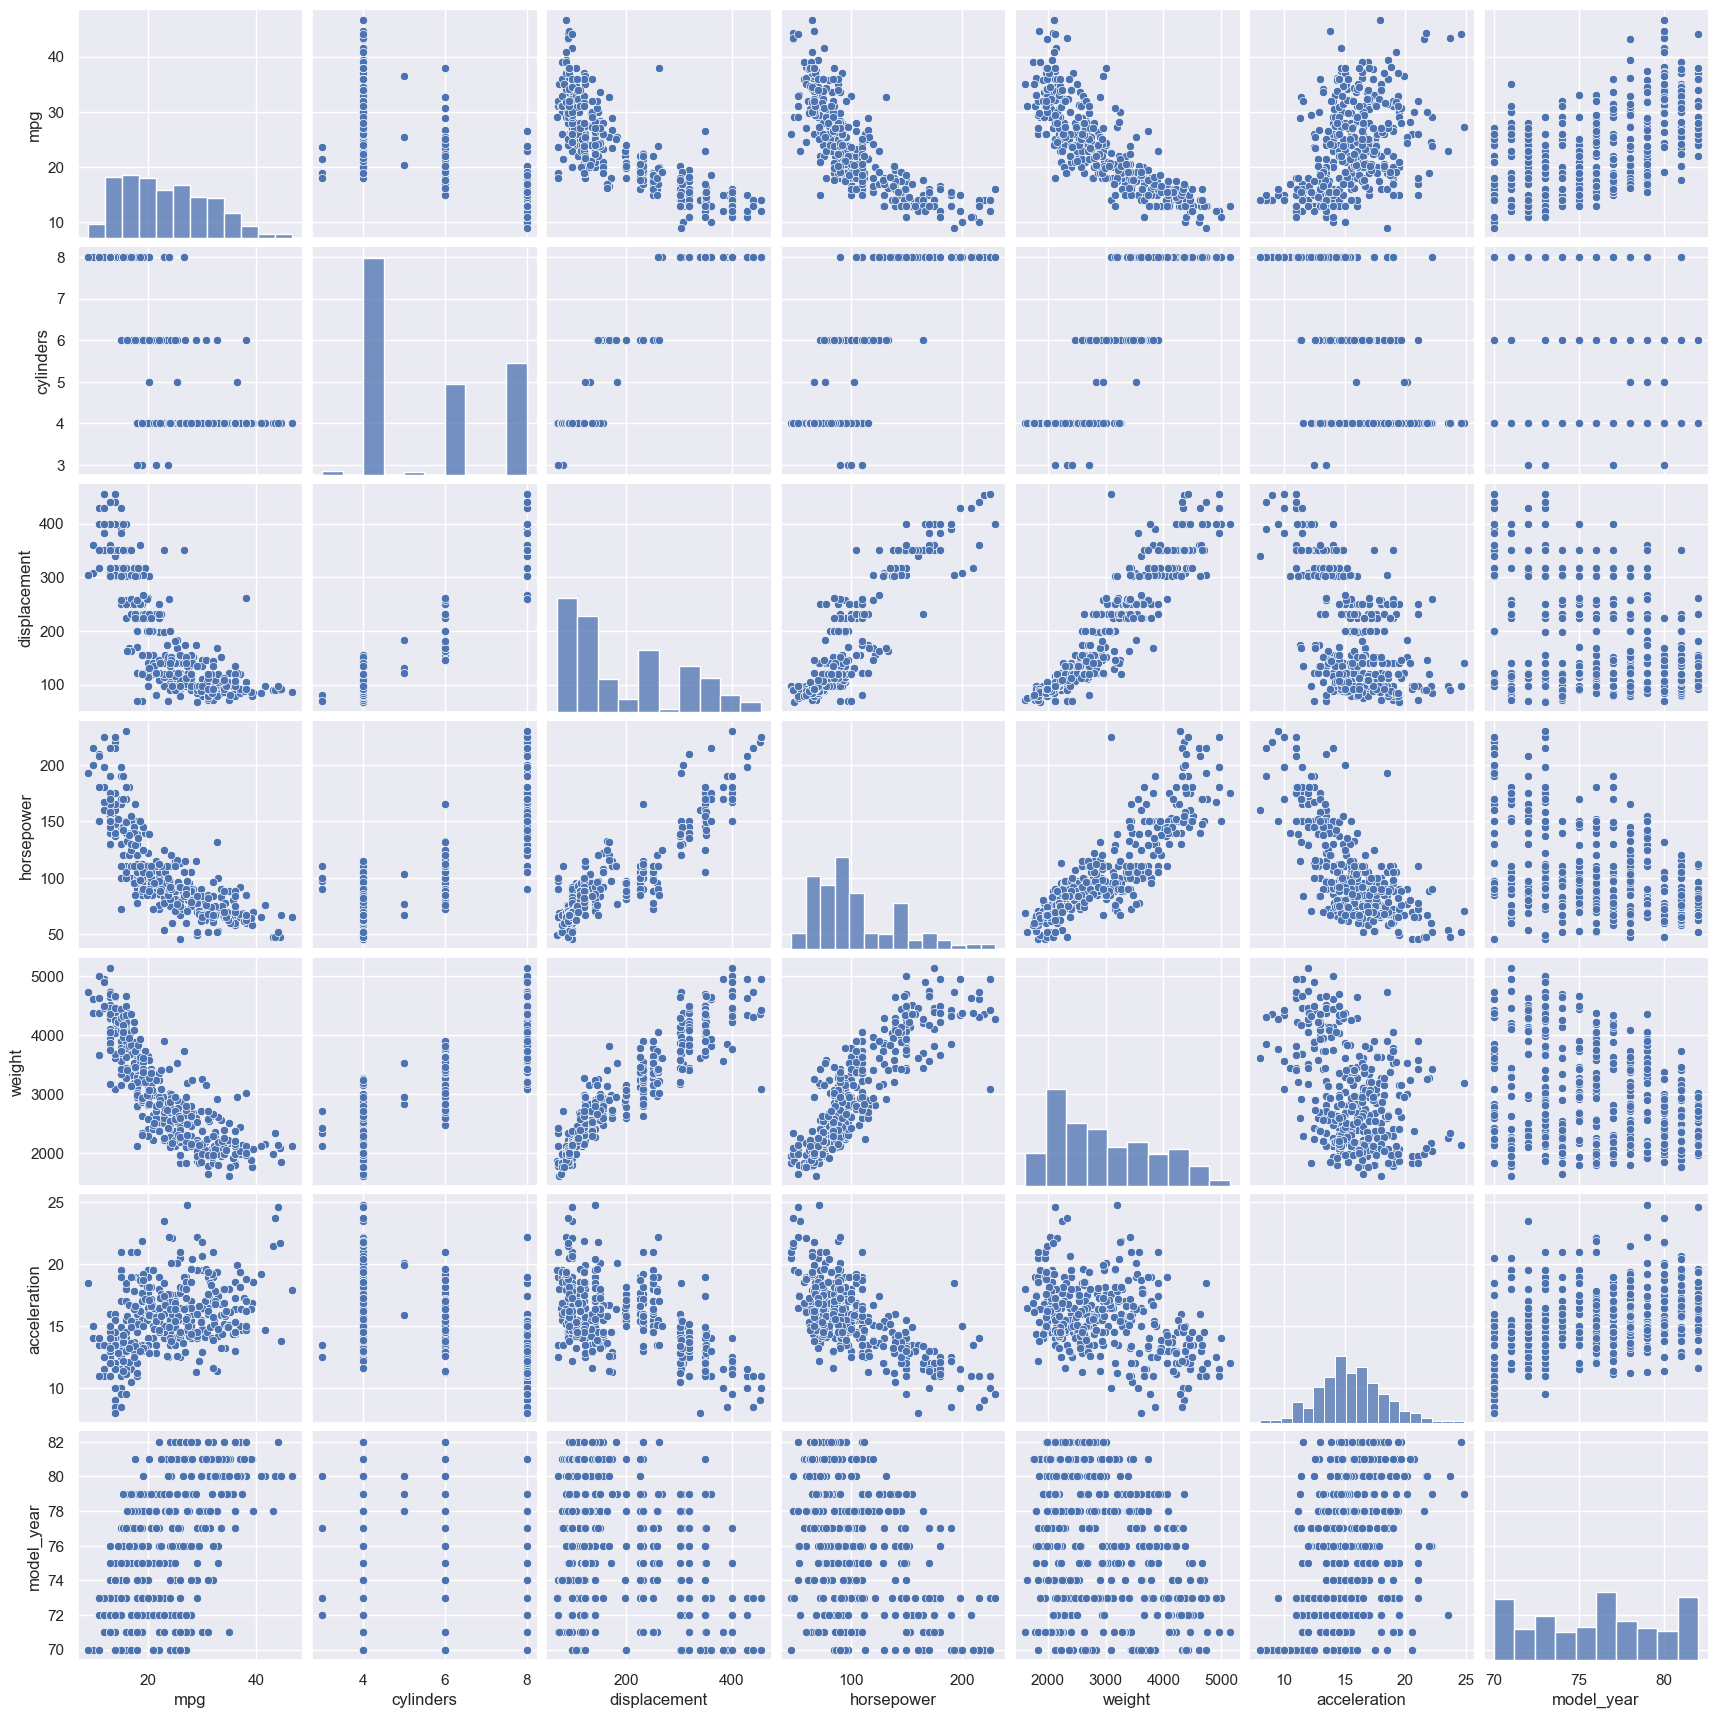

In [22]:
# pairplot을 이용한 시각화
sns.pairplot(data = auto)
plt.show()

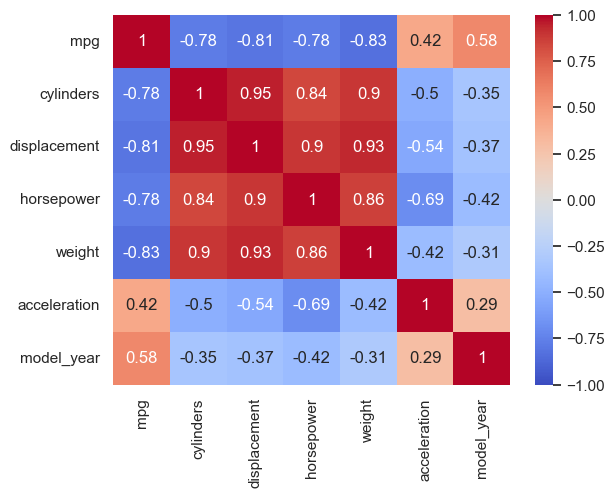

In [30]:
# sns.heatmap을 이용한 상관관계 시각화.
sns.heatmap(auto.corr(numeric_only = True), annot=True, cmap = 'coolwarm', vmin = -1, vmax = +1)
plt.show()

## 단순회귀모델 (Simple linear regression model)
: 단일 입력 변수로 연비(mpg) 예측.

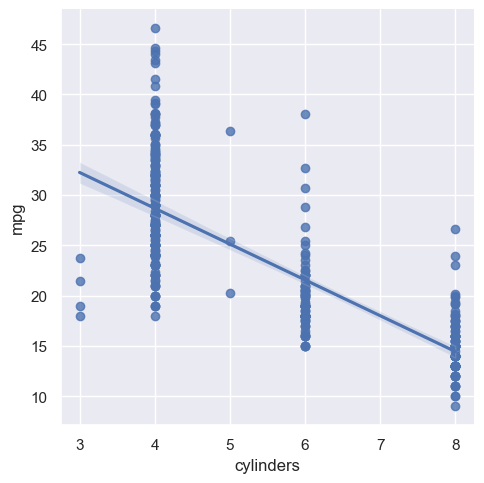

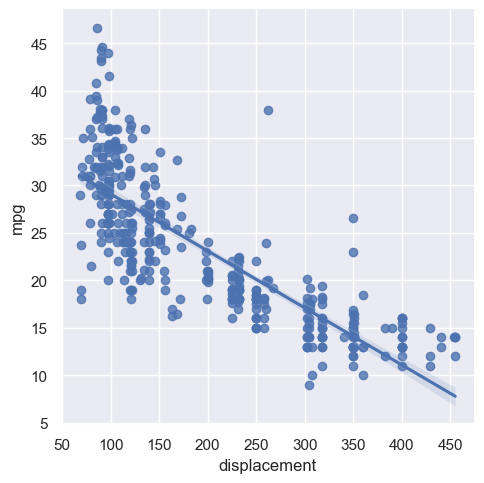

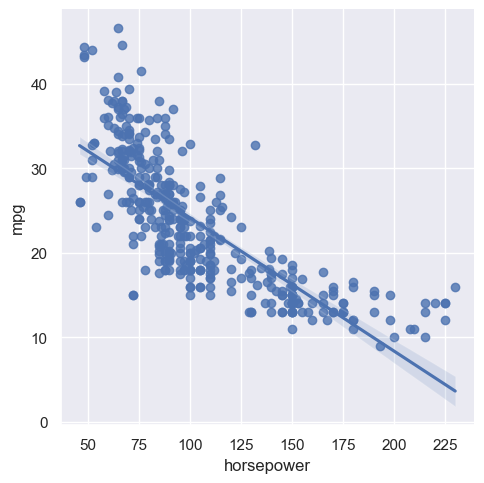

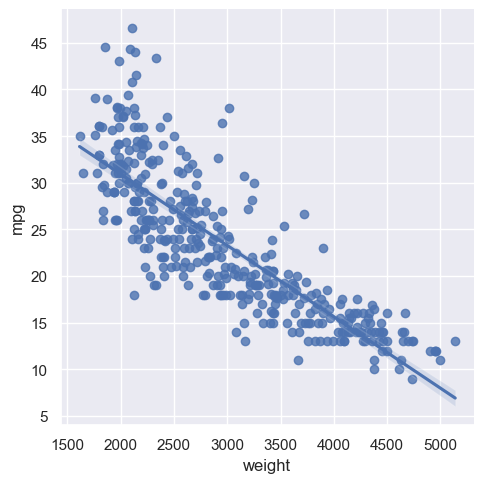

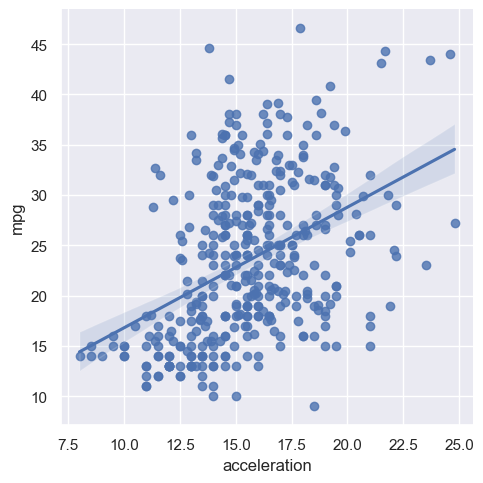

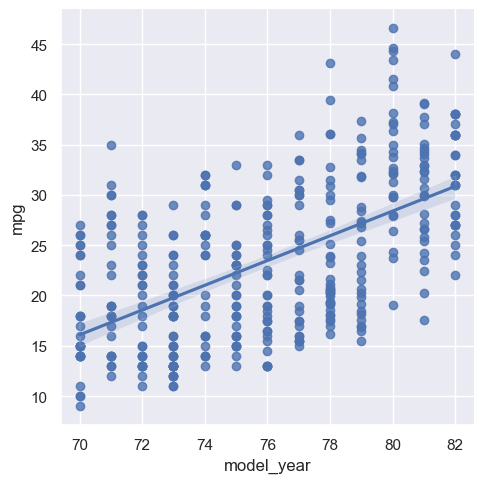

In [39]:
# sns.lmplot을 이용한 시각화
sns.lmplot(data = auto, x = 'cylinders', y = 'mpg')
sns.lmplot(data = auto, x = 'displacement', y = 'mpg')
sns.lmplot(data = auto, x = 'horsepower', y = 'mpg')
sns.lmplot(data = auto, x = 'weight', y = 'mpg')
sns.lmplot(data = auto, x = 'acceleration', y = 'mpg')
sns.lmplot(data = auto, x = 'model_year', y = 'mpg')
plt.show()

In [69]:
# statsmodel을 이용한 단순선형회귀 모델
# 입력변수: displacement (엔진 배기량)
simple1 = smf.ols('mpg ~ displacement', data = auto).fit()
simple1.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
No. Observations:                 392   F-statistic:                     718.7
Covariance Type:            nonrobust   Prob (F-statistic):           1.66e-90
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# statsmodel을 이용한 단순선형회귀 모델
# 입력변수: horsepower (마력)
simple2 = smf.ols('mpg ~ horsepower ', data = auto).fit()
simple2.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
No. Observations:                 392   F-statistic:                     599.7
Covariance Type:            nonrobust   Prob (F-statistic):           7.03e-81
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# statsmodel을 이용한 단순선형회귀 모델
# 입력변수: weight (차량 무게)
simple3 = smf.ols('mpg ~ weight ', data = auto).fit()
simple3.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
No. Observations:                 392   F-statistic:                     878.8
Covariance Type:            nonrobust   Prob (F-statistic):          6.02e-102
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# statsmodel을 이용한 단순선형회귀 모델
# 입력변수: acceleration (가속력)
simple4 = smf.ols('mpg ~ acceleration ', data = auto).fit()
simple4.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
No. Observations:                 392   F-statistic:                     85.15
Covariance Type:            nonrobust   Prob (F-statistic):           1.78e-18
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8332      2.048      2.359      0.019       0.806       8.861
acceleration     1.1976      0.130      9.228      0.000       0.942       1.453
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# statsmodel을 이용한 단순선형회귀 모델
# 입력변수: model_year (출시 연도)
simple5 = smf.ols('mpg ~ model_year', data = auto).fit()
simple5.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
No. Observations:                 392   F-statistic:                     198.3
Covariance Type:            nonrobust   Prob (F-statistic):           1.08e-36
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.0117      6.645    -10.536      0.000     -83.076     -56.947
model_year     1.2300      0.087     14.080      0.000       1.058       1.402
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# 모델 비교: R^2
print([simple1.rsquared, simple2.rsquared, simple3.rsquared, simple4.rsquared, simple5.rsquared])

# 단순선형 모델에서는 simple3(차량 무게) > simple1(배기량) > simple2(마력) > simple5(출시 연도) > simple4 (가속력) 순으로 예측력이 높음.

[0.6482294003193044, 0.6059482578894348, 0.6926304331206254, 0.1792070501562546, 0.33702781330962284]


In [57]:
# 모델 비교: AIC
print([simple1.aic, simple2.aic, simple3.aic, simple4.aic, simple5.aic])

[2316.8304943280746, 2361.3236578374017, 2263.9385485201983, 2648.968812235453, 2565.2619764484953]


## 다중선형회귀모델 (Multiple Linear Regression Model)
Forward selection (전진선택법)에 기반한 모델 변수 선택.

In [74]:
# 1번째 변수 : 단순선형회귀 모델 중에 가장 예측력이 높은 모델을 선택
# = simple3의 weight(차량 무게) 변수를 선택

model1 = smf.ols('mpg ~ weight', data = auto).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          6.02e-102
Time:                        11:44:15   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# 2번째 변수 선택
# : 남은 각 변수를 1개씩 더한 모델을 생성한 후, 가장 적합한 모델(AIC가 가장 낮은 모델)을 선택.

model1_1 = smf.ols('mpg ~ weight + displacement', data = auto).fit()
model1_2 = smf.ols('mpg ~ weight + horsepower', data = auto).fit()
model1_3 = smf.ols('mpg ~ weight + acceleration', data = auto).fit()
model1_4 = smf.ols('mpg ~ weight + model_year', data = auto).fit()

print([model1_1.aic, model1_2.aic, model1_3.aic, model1_4.aic])

[2257.7731011356195, 2248.0052095207257, 2256.8198609775854, 2081.1125136835612]


In [77]:
# model1_4가 AIC가 가장 낮아서 4가지 모델 중 가장 우수함.
# 모델 1_4
model1_4.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
No. Observations:                 392   F-statistic:                     819.5
Covariance Type:            nonrobust   Prob (F-statistic):          3.33e-140
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# 모델 1_2 비교
model1_2.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
No. Observations:                 392   F-statistic:                     467.9
Covariance Type:            nonrobust   Prob (F-statistic):          3.06e-104
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
# 모델 1 비교
model1.summary(slim=True)
# 모델 1과 모델 1_2는 설명력(R-squared)에서 큰 차이가 없음.
# 모델 1에 포함된 weight 변수와 모델 1_2에 추가된 horsepower간의 상관관계가 매우 높아서, horsepower로 더 설명되는 부분이 적음 (다중공선성).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
No. Observations:                 392   F-statistic:                     878.8
Covariance Type:            nonrobust   Prob (F-statistic):          6.02e-102
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
model2 = model1_4
# 변수 2개를 포함한 다중회귀모델로 model1_4를 확정: (weight) + (model_year)

In [84]:
# 3번째 변수 선택
# : 남은 각 변수를 1개씩 더한 모델을 생성한 후, 가장 적합한 모델(AIC가 가장 낮은 모델)을 선택.

model2_1 = smf.ols('mpg ~ weight + model_year + displacement', data = auto).fit()
model2_2 = smf.ols('mpg ~ weight + model_year + horsepower', data = auto).fit()
model2_3 = smf.ols('mpg ~ weight + model_year + acceleration', data = auto).fit()

print([model2_1.aic, model2_2.aic, model2_3.aic])
# 세 모델 간의 AIC 차이는 거의 없음.

[2083.108906329439, 2082.8291526047256, 2082.214888174107]


In [85]:
# model2 (weight + model_year) 변수 2개 모델과의 비교
print(model2.aic)

# model2의 AIC가 더 낮음: 모델의 복잡도를 고려할 때, model2가 변수 3개를 포함한 모델(model2_1, model2_2, model2_3)보다 우월함.

2081.1125136835612


In [86]:
model2.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
No. Observations:                 392   F-statistic:                     819.5
Covariance Type:            nonrobust   Prob (F-statistic):          3.33e-140
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
model2_3.summary(slim = True)
# 추가된 변수 'acceleration'의 계수는 통계적으로 유의하지 않음. 즉, 귀무가설에 따라 영향력 = 0으로 가정할 수 있음.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
No. Observations:                 392   F-statistic:                     546.5
Covariance Type:            nonrobust   Prob (F-statistic):          6.91e-139
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.9366      4.056     -3.683      0.000     -22.910      -6.963
weight          -0.0066      0.000    -28.502      0.000      -0.007      -0.006
model_year       0.7484      0.050     14.860      0.000       0.649       0.847
acceleration     0.0664      0.070      0.943      0.346      -0.072       0.205
================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# model1과 model2의 비교
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          6.02e-102
Time:                        11:55:59   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Wed, 04 Jun 2025   Prob (F-statistic):          3.33e-140
Time:                        11:56:02   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 다중회귀모델의 예측 시각화
X축: 예측값 (~.predict)

Y축: 실제값

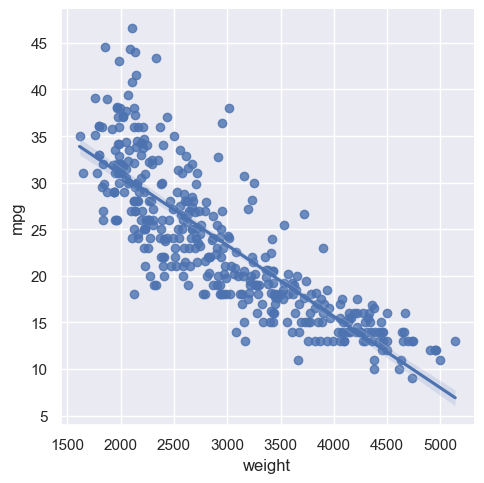

In [107]:
# 참고: lmplot
sns.lmplot(data = auto, x = 'weight', y= 'mpg')
plt.show()

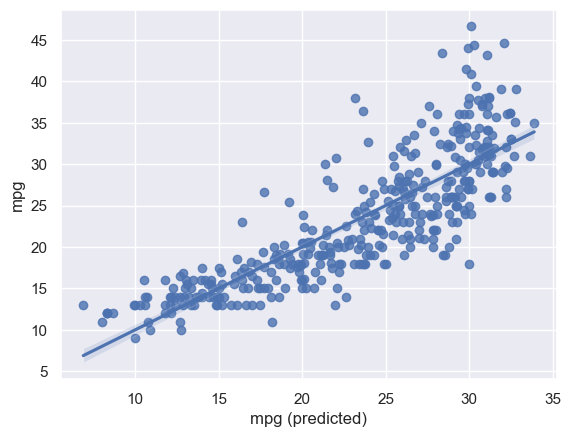

In [108]:
# 단순선형회귀모델(단일 요인): mpg ~ weight
ax = sns.regplot(y = auto.mpg, x = model1.predict());
ax.set_xlabel('mpg (predicted)');
plt.show()

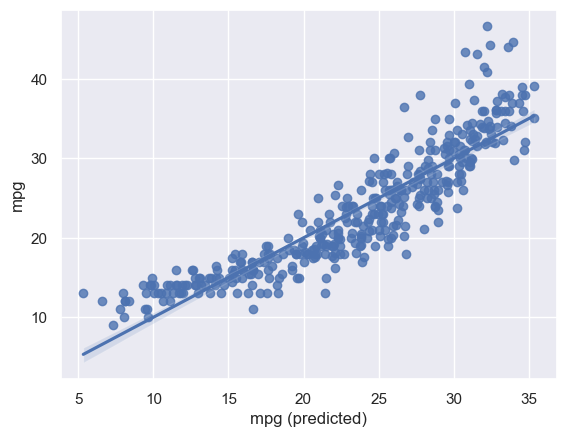

In [109]:
# 다중선형회귀모델(2개+ 요인): mpg ~ weight + model_year
ax = sns.regplot(y = auto.mpg, x = model2.predict());
ax.set_xlabel('mpg (predicted)');
plt.show()